<a href="https://colab.research.google.com/github/leemhoon00/prac_keras/blob/main/%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98_%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

코드 3-12 로이터 데이터셋 로드하기

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


코드 3-14 데이터 인코딩하기

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

레이블 원핫 인코딩

In [9]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

코드 3-15 모델 정의하기

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

코드 3-16 모델 컴파일하기

In [12]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

코드 3-17 검증 세트 준비하기

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

코드 3-18 모델 훈련하기

In [14]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 76ms/step - loss: 2.6113 - accuracy: 0.5532 - val_loss: 1.7410 - val_accuracy: 0.6560
Epoch 2/20
16/16 [==============================] - 1s 61ms/step - loss: 1.4208 - accuracy: 0.7171 - val_loss: 1.3001 - val_accuracy: 0.7310
Epoch 3/20
16/16 [==============================] - 1s 60ms/step - loss: 1.0507 - accuracy: 0.7793 - val_loss: 1.1415 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 61ms/step - loss: 0.8345 - accuracy: 0.8192 - val_loss: 1.0439 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 1s 62ms/step - loss: 0.6702 - accuracy: 0.8603 - val_loss: 0.9992 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 1s 60ms/step - loss: 0.5427 - accuracy: 0.8870 - val_loss: 0.9383 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 59ms/step - loss: 0.4352 - accuracy: 0.9109 - val_loss: 0.9299 - val_accuracy: 0.7950
Epoch 8/20
16

코드 3-19 훈련과 검증 손실 그리기

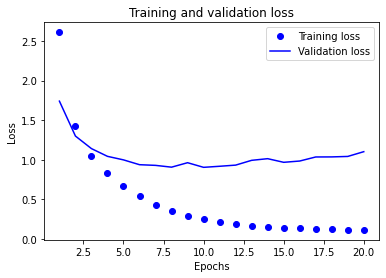

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

코드 3-20 훈련과 검증 정확도 그리기

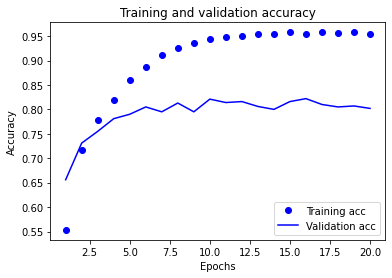

In [20]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

코드 3-21 모델을 처음부터 다시 훈련하기

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 71ms/step - loss: 2.6630 - accuracy: 0.5584 - val_loss: 1.7401 - val_accuracy: 0.6530
Epoch 2/9
16/16 [==============================] - 1s 59ms/step - loss: 1.4059 - accuracy: 0.7106 - val_loss: 1.3123 - val_accuracy: 0.7220
Epoch 3/9
16/16 [==============================] - 1s 58ms/step - loss: 1.0393 - accuracy: 0.7806 - val_loss: 1.1345 - val_accuracy: 0.7570
Epoch 4/9
16/16 [==============================] - 1s 58ms/step - loss: 0.8184 - accuracy: 0.8275 - val_loss: 1.0215 - val_accuracy: 0.7850
Epoch 5/9
16/16 [==============================] - 1s 59ms/step - loss: 0.6522 - accuracy: 0.8618 - val_loss: 0.9477 - val_accuracy: 0.8020
Epoch 6/9
16/16 [==============================] - 1s 58ms/step - loss: 0.5215 - accuracy: 0.8911 - val_loss: 0.9354 - val_accuracy: 0.8040
Epoch 7/9
16/16 [==============================] - 1s 59ms/step - loss: 0.4171 - accuracy: 0.9139 - val_loss: 0.9342 - val_accuracy: 0.8040
Epoch 8/9
16/16 [===

In [22]:
results

[0.9969746470451355, 0.784060537815094]

코드 3-22 새로운 데이터에 대해 예측하기

In [26]:
predictions = model.predict(x_test)
print(np.sum(predictions[0])) # 원소의 합
print(np.argmax(predictions[0])) #가장 큰 값이 예측 클래스

1.0
3
